In [1]:
import pandas as pd 

Reviewdata=pd.read_csv('train.csv')

In [2]:
Reviewdata.head(5)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
Reviewdata.shape

(38932, 5)

In [4]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [5]:
###Checking Missing Values in the data set and printing percentage 
### for missing values for each columns ###

count=Reviewdata.isnull().sum().sort_values(ascending=False)
percentage=((Reviewdata.isnull().sum()/len(Reviewdata)*100).sort_values(ascending=False))
missing_data=pd.concat([count,percentage],axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


Percenatge for defalut

Is_Response
happy        68.12
not happy    31.88
Name: proportion, dtype: float64


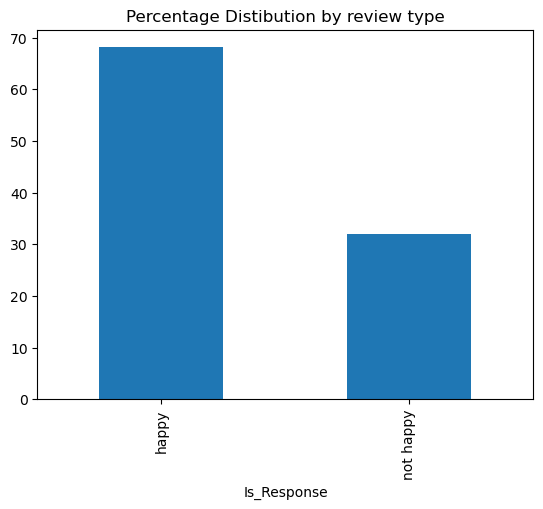

In [6]:
###Checking for the Distibution 
import matplotlib.pyplot as plt 
%matplotlib inline
print('Percenatge for defalut\n')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distibution by review type')
plt.show()


In [7]:
#Removing the columns 

Reviewdata.drop(columns=['User_ID','Device_Used',"Browser_Used"],inplace=True)

In [8]:
#Apply First Level Cleaning 

import re 
import string 

#This function converts to lower case,removes square bracket, remove numbers and punctutions 

def text_clean_1(text):
    text = text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text 


cleaned1 = lambda x:text_clean_1(x)









In [9]:
#Lets take a look at the updated text 

Reviewdata['cleaned_description']=pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [10]:
#Apply Second round of cleaning 

def text_clean_2(text):
    text=re.sub('[''"...]','',text)
    text=re.sub('\n','',text)
    return text
cleaned2=lambda x:text_clean_2(x)

In [11]:
Reviewdata['cleaned_description_new']=pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


In [12]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.Is_Response

IV_train,IV_test,DV_train,DV_test=train_test_split(Independent_var,Dependent_var,test_size=0.1,random_state=225)


print('IV_train:',len(IV_train))
print('IV_test:',len(IV_test))
print('DV_train:',len(DV_train))
print('DV_test:',len(DV_test))

IV_train: 35038
IV_test: 3894
DV_train: 35038
DV_test: 3894


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec=TfidfVectorizer()
clf2=LogisticRegression(solver='lbfgs')


from sklearn.pipeline import Pipeline

In [17]:
model=Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train,DV_train)

from sklearn.metrics import confusion_matrix

predictions= model.predict(IV_test)

confusion_matrix(predictions,DV_test)


array([[2417,  304],
       [ 154, 1019]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Accuracy:",accuracy_score(predictions,DV_test))
print('Precision:',precision_score(predictions,DV_test,average='weighted'))
print('Recall:',recall_score(predictions,DV_test,average='weighted'))

Accuracy: 0.8823831535695943
Precision: 0.8889271415963718
Recall: 0.8823831535695943


In [23]:
example=['the movie was not good']
result=model.predict(example)

print(result)

['not happy']
